# Diffusion Limited Aggregation

Diffusion limited aggregation (DLA)

# Full code
The code below intialises all necessary functions.\
The program generates a 2D matrix with a maximum structure radius within, which limits the size of the generated fractal.
The seed of the fractal is placed in the middle of the matrix and particles are set to randomly diffuse 1-by-1 from the edge of the circle towards the previously fixed points.\


/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:2147: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'location' of function 'checkAround'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<ipython-input-1-025cf77e240a>", line 26:
@jit
def checkAround(location,squareSize,matrix):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


still working, have added  2  random walkers.  Added to cluster:  0
save picture
still working, have added  502  random walkers.  Added to cluster:  8
save picture
still working, have added  1002  random walkers.  Added to cluster:  21
save picture
still working, have added  1502  random walkers.  Added to cluster:  35
save picture
still working, have added  2002  random walkers.  Added to cluster:  41
save picture
still working, have added  2502  random walkers.  Added to cluster:  53
save picture
still working, have added  3002  random walkers.  Added to cluster:  64
save picture
still working, have added  3502  random walkers.  Added to cluster:  81
save picture
still working, have added  4002  random walkers.  Added to cluster:  100
save picture
still working, have added  4502  random walkers.  Added to cluster:  115
save picture
still working, have added  5002  random walkers.  Added to cluster:  127
save picture
still working, have added  5502  random walkers.  Added to cluster: 

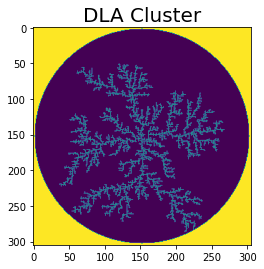

In [ ]:
import random
import numpy
import time
from numba import jit


def randomAtRadius(radius, seedX, seedY):
    theta = 2*numpy.pi*random.random() #generate random theta
    x=int(radius*numpy.cos(theta))+seedX #use trig to transfer into X
    y=int(radius*numpy.sin(theta))+seedY #find Y coordinate
    location=[x, y] #save locaction
    return location

"""
This functions checks the initial locations, to make sure it is not at the edge of the square.
If not at the edge:
checks the perimeter (up, down, left, right). The boolean variables foundFriend, exitCircle, nearEdge
are then assigned as TRUE, if they are true.
If the particle is not next to the other, and not at the edge of the square the new location is defined
PARAMETERS:
INPUT = location, in form [X,Y]
OUTPUT = new location ([X,Y]), foundFriend (BOOLEAN), nearEdge (BOOLEAN), exitCircle(BOOLEAN)
"""

@jit
def checkAround(location,squareSize,matrix):
	foundFriend = False #found another particle
	exitCircle = False #reached the required radius
	nearEdge=False #near the edge of the field


    # Check if a walker is near the edge
	if (location[1] + 1) > squareSize - 1 or (location[1] - 1) < 1 or (location[0] + 1) > squareSize - 1 or (location[0] - 1) < 1:
		nearEdge = True

    # If not near the edge, check if the walker is near a neighbor or reached the required radius
    # location[1]=row, location[2]=column
	if not nearEdge:
		neighborDown = matrix[location[1]+1,location[0]]
		if neighborDown == 1:
			foundFriend = True
		if neighborDown == 2:
			exitCircle = True

		neighborUp=matrix[location[1]-1,location[0]]
		if neighborUp==1:
			foundFriend=True
		if neighborUp==2:
			exitCircle=True

		neighborRight=matrix[location[1],location[0]+1]
		if neighborRight==1:
			foundFriend=True
		if neighborRight==2:
			exitCircle=True

		neighborLeft=matrix[location[1],location[0]-1]
		if neighborLeft==1:
			foundFriend=True
		if neighborLeft==2:
			exitCircle=True

    # After checking locations, if locations are good, start the random walk
	if not foundFriend and not nearEdge:
		decide = random.random()
		if decide<0.25:
			location = [location[0] - 1,location[1]]
		elif decide<0.5:
			location = [location[0] + 1,location[1]]
		elif decide<0.75:
			location = [location[0],location[1] + 1]
		else:
			location = [location[0],location[1] - 1]

	return (location, foundFriend, nearEdge, exitCircle)
"""
This is the main funciton for the DLA cluster model.
INPUT: RADIUS (Integer), needGif (Boolean)
OUTPUT: # of particles in the cluster (int), resulting matrix (populated by 0, 1, 2)
SAVED OUTPUT: in the folder images saves the resulting cluster image and .gif file
    -note: if folder images does not exist, it is created first
"""

import matplotlib.pyplot as plt
import os
from matplotlib import colors



############ Custom functions
#from checkAround import checkAround
#from randomAtRadius import randomAtRadius
#from indexM import indexM
############


def DLAcluster(radius, needGif):

    #check if folder "images" exists, and if not - create it
    if not os.path.isdir("images"):
        os.mkdir("images")

    if needGif:
        #Import there libraries if intend to save gif
        #NOTE: need imageio package, and ffmpeg. Refer to readme for more info
        import imageio


    #initialize variables that are dependent upon the radius
    # note - we add 2 to the parameters to get a thick broder between the edges of the disk and square
    # x coordinate of a seed particle
    seedX = radius+2
    # y coordinate of a seed
    seedY = radius+2
    # size of the grid to account for field of wandering around
    squareSize = radius*2+5

    matrix=numpy.zeros((squareSize, squareSize))

    for row in range (0,squareSize):
        for col in range (0,squareSize):
            #put a seed particle
            if row==seedY and col==seedX:
                matrix[row][col]=1
            #define field outside of circle
            elif numpy.sqrt((seedX-col)**2+(seedY-row)**2)>radius:
                matrix[row][col]=2
    cmap = colors.ListedColormap(['navy','white', 'navy'])

    # Initialize the random walker counter
    randomWalkersCount = 0

    # Set the cluster to NOT be complete
    completeCluster = False

    # Start running random walkers
    addedCount=0 #keep track of number added

    # initialize array for the used interval for graphing
    usedInterval=[]

    while not completeCluster:
        # Release a walker
        randomWalkersCount += 1
        random.seed()

        # Generate a (Xstart, Ystart) for walker, need within radius
        location=randomAtRadius(radius, seedX, seedY)

        # Initialize variables, like Friend tag and near edge identifier
        foundFriend = False #not near other particle
        nearEdge=False #not near the edge of the field


        # Set an individual walker out, stop if found a 'friend', give up if it reached the edge of the board
        while not foundFriend and not nearEdge:
            # Run the checking/walking function
            locationNew,foundFriend, nearEdge, exitCircle = checkAround(location,squareSize,matrix)

            # Add to the cluster if near a friend
            if foundFriend:
                # current location, replace with 1 and stop
                matrix[location[1]][location[0]] = 1
                addedCount+=1

            # Otherwise, save the location
            else:
                location = locationNew

        #print update
        intervalSavePic=range(2,400000,500)
        if randomWalkersCount in intervalSavePic:
            print("still working, have added ", randomWalkersCount, " random walkers.", " Added to cluster: ", addedCount)
        if needGif:
            if randomWalkersCount in intervalSavePic:
                print("save picture")
                usedInterval.append(randomWalkersCount) #append to the used count
                label=str(randomWalkersCount)
                plt.title("DLA Cluster", fontsize=20)
                plt.matshow(matrix, interpolation='nearest',cmap=cmap)#plt.cm.Blues) #ocean, Paired
                plt.xlabel("direction, $x$", fontsize=15)
                plt.ylabel("direction, $y$", fontsize=15)
                plt.savefig("images/cluster{}.png".format(label), dpi=200)
                plt.close()

        if randomWalkersCount==400000:
            print("CAUTION: had to break the cycle, taking too many iterations")
            completeCluster = True

        # Once it finds a friend and leaves the previous loop, we must check if it
        # is also touching a circular wall. If so, we have a complete cluster
        if foundFriend and exitCircle:
            print("Random walkers in the cluster: ",addedCount)
            completeCluster = True

    plt.title("DLA Cluster", fontsize=20)
    plt.matshow(matrix, interpolation='nearest',cmap=cmap)#plt.cm.Blues) #ocean, Paired
    plt.xlabel("direction, $x$", fontsize=15)
    plt.ylabel("direction, $y$", fontsize=15)
    plt.savefig("images/cluster.png", dpi=200)
    plt.close()

    print(usedInterval)

    if needGif:
        with imageio.get_writer('images/movie.gif', mode='I') as writer:
            for i in usedInterval:
                filename="images/cluster"+str(i)+".png"
                image = imageio.imread(filename)
                writer.append_data(image)
                os.remove(filename)
            image = imageio.imread("images/cluster.png")
            writer.append_data(image)

    return addedCount, matrix
start=time.time()
mass,matrix=DLAcluster(150,True)
end=time.time()
plt.imshow(matrix)


In [ ]:
@jit
def checkAroundDiag(location,squareSize,matrix):
	foundFriend = False #found another particle
	exitCircle = False #reached the required radius
	nearEdge=False #near the edge of the field


    # Check if a walker is near the edge
	if (location[1] + 1) > squareSize - 1 or (location[1] - 1) < 1 or (location[0] + 1) > squareSize - 1 or (location[0] - 1) < 1:
		nearEdge = True

    # If not near the edge, check if the walker is near a neighbor or reached the required radius
    # location[1]=row, location[2]=column
	if not nearEdge:
		neighborDown = matrix[location[1]+1,location[0]]
		if neighborDown == 1:
			foundFriend = True
		if neighborDown == 2:
			exitCircle = True

		neighborUp=matrix[location[1]-1,location[0]]
		if neighborUp==1:
			foundFriend=True
		if neighborUp==2:
			exitCircle=True

		neighborUpRight=matrix[location[1]+1,location[0]+1]
		if neighborRight==1:
			foundFriend=True
		if neighborRight==2:
			exitCircle=True

		neighborLeft=matrix[location[1],location[0]-1]
		if neighborLeft==1:
			foundFriend=True
		if neighborLeft==2:
			exitCircle=True

    # After checking locations, if locations are good, start the random walk
	if not foundFriend and not nearEdge:
		decide = random.random()
		if decide<0.25:
			location = [location[0] - 1,location[1]]
		elif decide<0.5:
			location = [location[0] + 1,location[1]]
		elif decide<0.75:
			location = [location[0],location[1] + 1]
		else:
			location = [location[0],location[1] - 1]

	return (location, foundFriend, nearEdge, exitCircle)

In [ ]:
# Random at radius

import random
import numpy


def randomAtRadius(radius, seedX, seedY):
    theta = 2*numpy.pi*random.random() #generate random theta
    x=int(radius*numpy.cos(theta))+seedX #use trig to transfer into X
    y=int(radius*numpy.sin(theta))+seedY #find Y coordinate
    location=[x, y] #save locaction
    return location

In [ ]:
# Check around

def checkAround(location,squareSize,matrix):
	foundFriend = False #found another particle
	exitCircle = False #reached the required radius
	nearEdge=False #near the edge of the field


    # Check if a walker is near the edge
	if (location[1] + 1) > squareSize - 1 or (location[1] - 1) < 1 or (location[0] + 1) > squareSize - 1 or (location[0] - 1) < 1:
		nearEdge = True

    # If not near the edge, check if the walker is near a neighbor or reached the required radius
    # location[1]=row, location[2]=column
	if not nearEdge:
		neighborDown = matrix[location[1]+1,location[0]]
		if neighborDown == 1:
			foundFriend = True
		if neighborDown == 2:
			exitCircle = True

		neighborUp=matrix[location[1]-1,location[0]]
		if neighborUp==1:
			foundFriend=True
		if neighborUp==2:
			exitCircle=True

		neighborRight=matrix[location[1],location[0]+1]
		if neighborRight==1:
			foundFriend=True
		if neighborRight==2:
			exitCircle=True

		neighborLeft=matrix[location[1],location[0]-1]
		if neighborLeft==1:
			foundFriend=True
		if neighborLeft==2:
			exitCircle=True

    # After checking locations, if locations are good, start the random walk
	if not foundFriend and not nearEdge:
		decide = random.random()
		if decide<0.25:
			location = [location[0] - 1,location[1]]
		elif decide<0.5:
			location = [location[0] + 1,location[1]]
		elif decide<0.75:
			location = [location[0],location[1] + 1]
		else:
			location = [location[0],location[1] - 1]

	return (location, foundFriend, nearEdge, exitCircle)

In [ ]:
# DLA cluster
import matplotlib.pyplot as plt
import os
from matplotlib import colors

def DLAcluster(radius, needGif):

    #check if folder "images" exists, and if not - create it
    if not os.path.isdir("images"):
        os.mkdir("images")

    if needGif:
        #Import there libraries if intend to save gif
        #NOTE: need imageio package, and ffmpeg. Refer to readme for more info
        import imageio


    #initialize variables that are dependent upon the radius
    # note - we add 2 to the parameters to get a thick broder between the edges of the disk and square
    # x coordinate of a seed particle
    seedX = radius+2
    # y coordinate of a seed
    seedY = radius+2
    # size of the grid to account for field of wandering around
    squareSize = radius*2+5

    matrix=numpy.zeros((squareSize, squareSize))

    for row in range (0,squareSize):
        for col in range (0,squareSize):
            #put a seed particle
            if row==seedY and col==seedX:
                matrix[row][col]=1
            #define field outside of circle
            elif numpy.sqrt((seedX-col)**2+(seedY-row)**2)>radius:
                matrix[row][col]=2
    cmap = colors.ListedColormap(['navy','white', 'navy'])

    # Initialize the random walker counter
    randomWalkersCount = 0

    # Set the cluster to NOT be complete
    completeCluster = False

    # Start running random walkers
    addedCount=0 #keep track of number added

    # initialize array for the used interval for graphing
    usedInterval=[]

    while not completeCluster:
        # Release a walker
        randomWalkersCount += 1
        random.seed()

        # Generate a (Xstart, Ystart) for walker, need within radius
        location=randomAtRadius(radius, seedX, seedY)

        # Initialize variables, like Friend tag and near edge identifier
        foundFriend = False #not near other particle
        nearEdge=False #not near the edge of the field


        # Set an individual walker out, stop if found a 'friend', give up if it reached the edge of the board
        while not foundFriend and not nearEdge:
            # Run the checking/walking function
            locationNew,foundFriend, nearEdge, exitCircle = checkAround(location,squareSize,matrix)

            # Add to the cluster if near a friend
            if foundFriend:
                # current location, replace with 1 and stop
                matrix[location[1]][location[0]] = 1
                addedCount+=1

            # Otherwise, save the location
            else:
                location = locationNew

        #print update
        intervalSavePic=range(2,400000,500)
        if randomWalkersCount in intervalSavePic:
            print("still working, have added ", randomWalkersCount, " random walkers.", " Added to cluster: ", addedCount)
        if needGif:
            if randomWalkersCount in intervalSavePic:
                print("save picture")
                usedInterval.append(randomWalkersCount) #append to the used count
                label=str(randomWalkersCount)
                plt.title("DLA Cluster", fontsize=20)
                plt.matshow(matrix, interpolation='nearest',cmap=cmap)#plt.cm.Blues) #ocean, Paired
                plt.xlabel("direction, $x$", fontsize=15)
                plt.ylabel("direction, $y$", fontsize=15)
                plt.savefig("images/cluster{}.png".format(label), dpi=200)
                plt.close()

        if randomWalkersCount==400000:
            print("CAUTION: had to break the cycle, taking too many iterations")
            completeCluster = True

        # Once it finds a friend and leaves the previous loop, we must check if it
        # is also touching a circular wall. If so, we have a complete cluster
        if foundFriend and exitCircle:
            print("Random walkers in the cluster: ",addedCount)
            completeCluster = True

    plt.title("DLA Cluster", fontsize=20)
    plt.matshow(matrix, interpolation='nearest',cmap=cmap)#plt.cm.Blues) #ocean, Paired
    plt.xlabel("direction, $x$", fontsize=15)
    plt.ylabel("direction, $y$", fontsize=15)
    plt.savefig("images/cluster.png", dpi=200)
    plt.close()

    print(usedInterval)

    if needGif:
        with imageio.get_writer('images/movie.gif', mode='I') as writer:
            for i in usedInterval:
                filename="images/cluster"+str(i)+".png"
                image = imageio.imread(filename)
                writer.append_data(image)
                os.remove(filename)
            image = imageio.imread("images/cluster.png")
            writer.append_data(image)

    return addedCount, matrix


still working, have added  2  random walkers.  Added to cluster:  0
save picture
still working, have added  502  random walkers.  Added to cluster:  11
save picture
still working, have added  1002  random walkers.  Added to cluster:  29
save picture
still working, have added  1502  random walkers.  Added to cluster:  49
save picture
still working, have added  2002  random walkers.  Added to cluster:  75
save picture
still working, have added  2502  random walkers.  Added to cluster:  97
save picture
still working, have added  3002  random walkers.  Added to cluster:  122
save picture
still working, have added  3502  random walkers.  Added to cluster:  139
save picture
still working, have added  4002  random walkers.  Added to cluster:  167
save picture
still working, have added  4502  random walkers.  Added to cluster:  196
save picture
still working, have added  5002  random walkers.  Added to cluster:  223
save picture
still working, have added  5502  random walkers.  Added to cluste

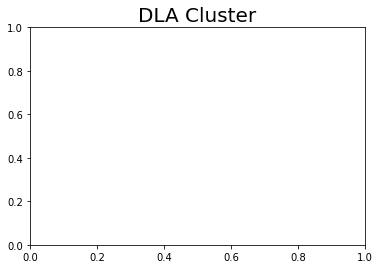

In [ ]:
mass,matrix=DLAcluster(90,True)

In [ ]:
plt.matshow(matrix, interpolation='nearest', cmap=cmap) # show the final matrix

NameError: ignored

In [ ]:
# Calculate fractional dimensionality
from scipy.optimize import curve_fit

radiusArray=numpy.arange(10,80,5)
mass=[]

for i in radiusArray:
    massValue,matrix=DLAcluster(i,False) #import radius and True/False for GIF
    mass.append(massValue)

#------- Find fit for mass and radius of the cluster:
# Find log radius and log mass
# Should be a linear function a+bx, with the slope b equal to the power of t and 'a'=scaling

#Find Log of all the arrays
logRadius=numpy.log(radiusArray)
logMass=numpy.log(mass)

#Fit a log function using numpy polyfit
fitLog=numpy.polyfit(logRadius, logMass,1)
fitLogFunc=numpy.poly1d(fitLog)

#print out the results
print("Parameters for the log fit: slope = ",fitLog[0],"shift: ",fitLog[1])
print("Parameters from the log fit: form is e^",fitLog[1],"*r^",fitLog[0])
num=str(numpy.round(fitLog[0],3))

# ------------------------------------------------------------------------------

################################################################################
### Create Plots
################################################################################

# ------------------------------------------------------------------------------

#--------------- Plot log
fig=plt.subplot()
plt.scatter(logRadius,logMass, color='tomato', edgecolors='tomato', s=30)
plt.plot(logRadius, fitLogFunc(logRadius),color='dodgerblue', lw=3)
plt.title("Log-log plot, mass vs radius",fontsize=20)
plt.xlabel("Log radius",fontsize=15)
plt.ylabel("Log mass",fontsize=15)
plt.grid(True)
fig.text(2.6,4.3,'fractal dimensionality:'+num)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
plt.savefig('logRadiusMass.png')
plt.show()

still working, have added  2  random walkers.  Added to cluster:  0
still working, have added  502  random walkers.  Added to cluster:  26
still working, have added  1002  random walkers.  Added to cluster:  85
still working, have added  1502  random walkers.  Added to cluster:  177
Random walkers in the cluster:  225
[]


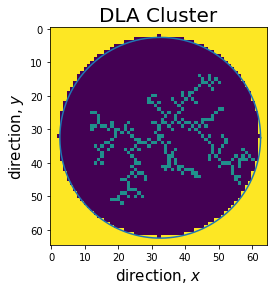

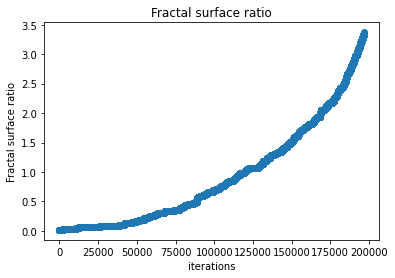

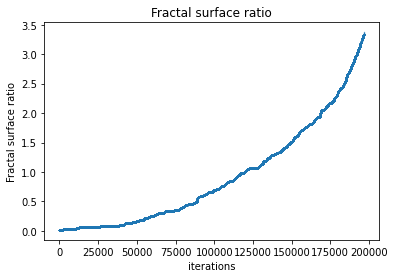

R² = 0.9967486453953789
fitted function: y =  0.23399246223115586 *exp( 1.3567153019151482e-05 *x) +  -0.25738664118618654


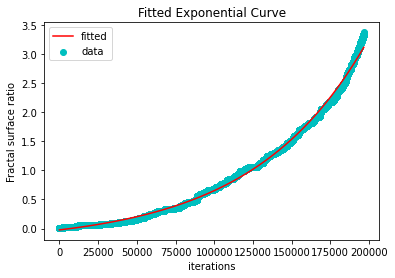

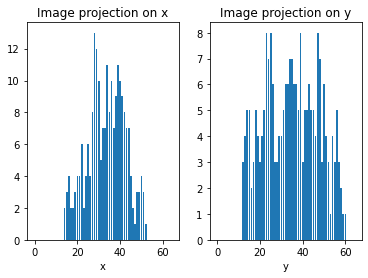

In [ ]:
from IPython.lib.display import YouTubeVideo
import random
import numpy
import time
from numba import jit


def randomAtRadius(radius, seedX, seedY):
    theta = 2*numpy.pi*random.random() #generate random theta
    x=int(radius*numpy.cos(theta))+seedX #use trig to transfer into X
    y=int(radius*numpy.sin(theta))+seedY #find Y coordinate
    location=[x, y] #save locaction
    return location

"""
This functions checks the initial locations, to make sure it is not at the edge of the square.
If not at the edge:
checks the perimeter (up, down, left, right). The boolean variables foundFriend, exitCircle, nearEdge
are then assigned as TRUE, if they are true.
If the particle is not next to the other, and not at the edge of the square the new location is defined
PARAMETERS:
INPUT = location, in form [X,Y]
OUTPUT = new location ([X,Y]), foundFriend (BOOLEAN), nearEdge (BOOLEAN), exitCircle(BOOLEAN)
"""

def checkAround(location,squareSize,matrix):
    foundFriend = False #found another particle
    exitCircle = False #reached the required radius
    nearEdge=False #near the edge of the field



    if (location[1] + 1) > squareSize - 1 or (location[1] - 1) < 1 or (location[0] + 1) > squareSize - 1 or (location[0] - 1) < 1:
      nearEdge=True
    if not nearEdge:
        neighborDown = matrix[location[1]+1,location[0]]
        if neighborDown == 1:
            foundFriend = True
        if neighborDown == 2:
            exitCircle = True

        neighborUp=matrix[location[1]-1,location[0]]
        if neighborUp==1:
            foundFriend=True
        if neighborUp==2:
            exitCircle=True

        neighborRight=matrix[location[1],location[0]+1]
        if neighborRight==1:
            foundFriend=True
        if neighborRight==2:
            exitCircle=True

        neighborLeft=matrix[location[1],location[0]-1]
        if neighborLeft==1:
            foundFriend=True
        if neighborLeft==2:
            exitCircle=True


        neighborUL=matrix[location[1]-1,location[0]-1]
        if neighborUL==1:
            foundFriend=True
        if neighborUL==2:
            exitCircle=True

        neighborUR=matrix[location[1]-1,location[0]+1]
        if neighborUR==1:
            foundFriend=True
        if neighborUR==2:
            exitCircle=True

        neighborDL=matrix[location[1]+1,location[0]-1]
        if neighborDL==1:
            foundFriend=True
        if neighborDL==2:
            exitCircle=True

        neighborDR=matrix[location[1]+1,location[0]+1]
        if neighborDR==1:
            foundFriend=True
        if neighborDR==2:
            exitCircle=True


    # After checking locations, if locations are good, start the random walk
    if not foundFriend and not nearEdge:
        decide = random.random()
        # UL-U-UR-R-DR-D-DL-L
        if decide<0.125:
            location=[location[0] - 1,location[1]-1]
        elif decide<0.25:
            location = [location[0] - 1,location[1]]
        elif decide<0.375:
            location = [location[0] - 1,location[1]+1]
        elif decide<0.5:
            location = [location[0] ,location[1]+1]
        elif decide<0.625:
            location = [location[0]+1,location[1]+1]
        elif decide<0.75:
            location = [location[0]+1,location[1]]
        elif decide<0.875:
            location = [location[0]+1,location[1]-1]
        else:
            location = [location[0],location[1] - 1]

    return (location, foundFriend, nearEdge, exitCircle)


import matplotlib.pyplot as plt
import os
from matplotlib import colors
import numpy as np


############ Custom functions
#from checkAround import checkAround
#from randomAtRadius import randomAtRadius
#from indexM import indexM
############


def DLAcluster(radius, needGif):

    #check if folder "images" exists, and if not - create it
    if not os.path.isdir("images"):
        os.mkdir("images")

    if needGif:
        #Import there libraries if intend to save gif
        #NOTE: need imageio package, and ffmpeg. Refer to readme for more info
        import imageio


    #initialize variables that are dependent upon the radius
    # note - we add 2 to the parameters to get a thick broder between the edges of the disk and square
    # x coordinate of a seed particle
    seedX = radius+2
    # y coordinate of a seed
    seedY = radius+2
    # size of the grid to account for field of wandering around
    squareSize = radius*2+5

    matrix=numpy.zeros((squareSize, squareSize))
    fractalsurfaceratio = []

    for row in range (0,squareSize):
        for col in range (0,squareSize):
            #put a seed particle
            if row==seedY and col==seedX:
                matrix[row][col]=1
            #define field outside of circle
            elif numpy.sqrt((seedX-col)**2+(seedY-row)**2)>radius:
                matrix[row][col]=2
    cmap = colors.ListedColormap(['navy','white', 'navy'])

    # Initialize the random walker counter
    randomWalkersCount = 0

    # Set the cluster to NOT be complete
    completeCluster = False

    # Start running random walkers
    addedCount=0 #keep track of number added

    # initialize array for the used interval for graphing
    usedInterval=[]

    while not completeCluster:
        # Release a walker
        randomWalkersCount += 1
        random.seed()

        # Generate a (Xstart, Ystart) for walker, need within radius
        location=randomAtRadius(radius, seedX, seedY)

        # Initialize variables, like Friend tag and near edge identifier
        foundFriend = False #not near other particle
        nearEdge=False #not near the edge of the field


        # Set an individual walker out, stop if found a 'friend', give up if it reached the edge of the board
        while not foundFriend and not nearEdge:
            # Run the checking/walking function
            locationNew,foundFriend, nearEdge, exitCircle = checkAround(location,squareSize,matrix)

            # Add to the cluster if near a friend
            if foundFriend:
                # current location, replace with 1 and stop
                matrix[location[1]][location[0]] = 1
                addedCount+=1

            # Otherwise, save the location
            else:
                location = locationNew

            # Count occurrence of element '1' in each column --- Catalina
            fractalpixels_1 = sum(np.count_nonzero(matrix == 1, axis=0))
            fractalsurface = fractalpixels_1/(squareSize^2)
            fractalsurfaceratio.append(fractalsurface)

        #print update
        intervalSavePic=range(2,400000,500)
        if randomWalkersCount in intervalSavePic:
            print("still working, have added ", randomWalkersCount, " random walkers.", " Added to cluster: ", addedCount)
        if needGif:
            if randomWalkersCount in intervalSavePic:
                print("save picture")
                usedInterval.append(randomWalkersCount) #append to the used count
                label=str(randomWalkersCount)
                plt.title("DLA Cluster", fontsize=20)
                plt.matshow(matrix, interpolation='nearest',cmap=cmap)#plt.cm.Blues) #ocean, Paired
                plt.xlabel("direction, $x$", fontsize=15)
                plt.ylabel("direction, $y$", fontsize=15)
                plt.savefig("images/cluster{}.png".format(label), dpi=200)
                plt.close()

        if randomWalkersCount==400000:
            print("CAUTION: had to break the cycle, taking too many iterations")
            completeCluster = True

        # Once it finds a friend and leaves the previous loop, we must check if it
        # is also touching a circular wall. If so, we have a complete cluster
        if foundFriend and exitCircle:
            print("Random walkers in the cluster: ",addedCount)
            completeCluster = True


    #plt.matshow(matrix, interpolation='nearest',cmap=cmap)#plt.cm.Blues) #ocean, Paired
    angle = np.linspace( 0 , 2 * np.pi , 150 )

    radius = 30

    x = radius * np.cos( angle ) + squareSize/2
    y = radius * np.sin( angle ) + squareSize/2



    plt.imshow(matrix)
    plt.plot(x,y)
    plt.title("DLA Cluster", fontsize=20)
    plt.xlabel("direction, $x$", fontsize=15)
    plt.ylabel("direction, $y$", fontsize=15)
    #plt.savefig("images/cluster.png", dpi=200)

    print(usedInterval)

    plt.figure()
    plt.title("Fractal surface ratio")
    plt.xlabel("iterations")
    plt.ylabel("Fractal surface ratio")
    iterations_plot = np.array(range(0, len(fractalsurfaceratio)))
    plt.scatter(iterations_plot, fractalsurfaceratio)
    plt.show()

    plt.figure()
    plt.title("Fractal surface ratio")
    plt.xlabel("iterations")
    plt.ylabel("Fractal surface ratio")
    iterations_plot = np.array(range(0, len(fractalsurfaceratio)))
    #x = iterations_plot[::10000]
    #y = fractalsurfaceratio[::10000]
    #plt.scatter(x, y)
    plt.scatter(iterations_plot, fractalsurfaceratio, s=0.1)
    plt.show()

    import scipy.optimize

    # Fit the function a * np.exp(b * t) + c to x and y
    #popt, pcov = curve_fit(lambda t, a, b: a * np.exp(b * t), iterations_plot, fractalsurfaceratio)
    #a = popt[0]
    #b = popt[1]
    #print(a)
    #print(b)
    #x_fitted = np.linspace(0, np.max(iterations_plot), 100)
    #y_fitted = a * np.exp(b * x_fitted)
    #print(x_fitted)
    #print(y_fitted)
    #plt.figure()
    #plt.scatter(iterations_plot, fractalsurfaceratio, label='Fractal surface ratio')
    #plt.plot(x_fitted, y_fitted, 'k')
    #plt.title("Fractal surface ratio with exponential fit")
    #plt.xlabel("iterations")
    #plt.ylabel("Fractal surface ratio")
    #plt.show()

    #take 2 on fitting
    def monoExp(x, a, b, c):
        return a * np.exp(b * x) + c

    p0 = [0,0,0]
    params, cv = scipy.optimize.curve_fit(monoExp, iterations_plot, fractalsurfaceratio, p0)
    a, b, c = params
    #sampleRate = 20_000 # Hz
    #tauSec = (1 / t) / sampleRate

    # determine quality of the fit
    squaredDiffs = np.square(fractalsurfaceratio - monoExp(iterations_plot, a, b, c))
    squaredDiffsFromMean = np.square(fractalsurfaceratio - np.mean(fractalsurfaceratio))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    print(f"R² = {rSquared}")
    print('fitted function: y = ',a,'*exp(',b,'*x) + ',c)

    # plot the results
    plt.figure()
    plt.scatter(iterations_plot, fractalsurfaceratio, color='c', label="data")
    plt.plot(iterations_plot, monoExp(iterations_plot, a, b, c), 'r', label="fitted")
    plt.title("Fitted Exponential Curve")
    plt.xlabel("iterations")
    plt.ylabel("Fractal surface ratio")
    plt.legend()


    if needGif:
        with imageio.get_writer('images/movie.gif', mode='I') as writer:
            for i in usedInterval:
                filename="images/cluster"+str(i)+".png"
                image = imageio.imread(filename)
                writer.append_data(image)
                os.remove(filename)
            image = imageio.imread("images/cluster.png")
            writer.append_data(image)

    return addedCount, matrix

start=time.time()
mass,matrix=DLAcluster(30,False)
end=time.time()
#plt.imshow(matrix)

#plotting histogram of fractal
matrix_1 = np.where(matrix == 1, matrix, 0)
matrix_1_y = np.sum(matrix_1, axis = 0)
matrix_1_x = np.sum(matrix_1, axis = 1)
axis_barplot = np.array(range(0, matrix_1_y.shape[0]))
axis_barplot_str = [str(x) for x in axis_barplot]

fig,ax = plt.subplots(1,2)
ax[0].bar(axis_barplot, matrix_1_x)
ax[0].set(xlabel='x')
ax[0].set(title='Image projection on x')
ax[1].bar(axis_barplot, matrix_1_y)
ax[1].set(xlabel='y')
ax[1].set(title='Image projection on y')
plt.show()

[0 1 2 3]
4
[0 1 2 1]
[[0 1]
 [1 0]]
[1 1]
[0 1 0 1]
2


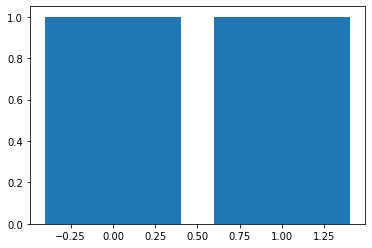

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
A = np.array([0, 1, 2, 1])
B = np.array(range(0, len(A)))
C = np.array([[0, 1], [1, 0]])
C_sum = np.sum(C, axis = 0)
print(B)
print(len(A))
print(A)
print(C)
print(C_sum)
A_new = np.where(A == 1, A, 0)
print(A_new)

axis = np.array(range(0, C_sum.shape[0]))
fig,ax = plt.subplots()
ax.bar(axis, C_sum)
print(C_sum.shape[0])

still working, have added  2  random walkers.  Added to cluster:  0
Random walkers in the cluster:  20
[]
still working, have added  2  random walkers.  Added to cluster:  0
Random walkers in the cluster:  63
[]
still working, have added  2  random walkers.  Added to cluster:  0
still working, have added  502  random walkers.  Added to cluster:  55
still working, have added  1002  random walkers.  Added to cluster:  169
Random walkers in the cluster:  177
[]
still working, have added  2  random walkers.  Added to cluster:  0
still working, have added  502  random walkers.  Added to cluster:  38
still working, have added  1002  random walkers.  Added to cluster:  108
still working, have added  1502  random walkers.  Added to cluster:  201
Random walkers in the cluster:  239
[]
still working, have added  2  random walkers.  Added to cluster:  0
still working, have added  502  random walkers.  Added to cluster:  26
still working, have added  1002  random walkers.  Added to cluster:  63
st

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


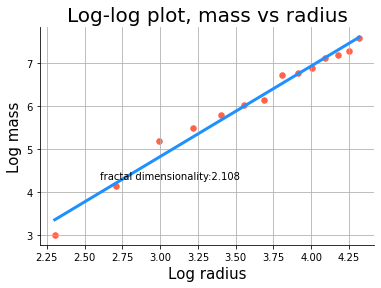

In [ ]:
from scipy.optimize import curve_fit

radiusArray=numpy.arange(10,80,5)
mass=[]

for i in radiusArray:
    massValue,matrix=DLAcluster(i,False) #import radius and True/False for GIF
    mass.append(massValue)

#------- Find fit for mass and radius of the cluster:
# Find log radius and log mass
# Should be a linear function a+bx, with the slope b equal to the power of t and 'a'=scaling

#Find Log of all the arrays
logRadius=numpy.log(radiusArray)
logMass=numpy.log(mass)

#Fit a log function using numpy polyfit
fitLog=numpy.polyfit(logRadius, logMass,1)
fitLogFunc=numpy.poly1d(fitLog)

#print out the results
print("Parameters for the log fit: slope = ",fitLog[0],"shift: ",fitLog[1])
print("Parameters from the log fit: form is e^",fitLog[1],"*r^",fitLog[0])
num=str(numpy.round(fitLog[0],3))

# ------------------------------------------------------------------------------

################################################################################
### Create Plots
################################################################################

# ------------------------------------------------------------------------------

#--------------- Plot log
fig=plt.subplot()
plt.scatter(logRadius,logMass, color='tomato', edgecolors='tomato', s=30)
plt.plot(logRadius, fitLogFunc(logRadius),color='dodgerblue', lw=3)
plt.title("Log-log plot, mass vs radius",fontsize=20)
plt.xlabel("Log radius",fontsize=15)
plt.ylabel("Log mass",fontsize=15)
plt.grid(True)
fig.text(2.6,4.3,'fractal dimensionality:'+num)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
plt.savefig('logRadiusMass.png')
plt.show()